In [12]:
from algorithms.REINFORCE import Reinforce
%matplotlib inline
import gymnasium as gym
import highway_env
from matplotlib import pyplot as plt

# Controls:
CONTINUOUS_ACTIONS = False
TESTING = True
EPISODES = 1500
BASELINE = True
###########

if CONTINUOUS_ACTIONS and TESTING:
    env = gym.make("Pendulum-v1", render_mode="rgb_array")
elif CONTINUOUS_ACTIONS and not TESTING:
    env = gym.make('highway-fast-v0', config={"action": {"type": "ContinuousAction"}}, render_mode='rgb_array')
elif not CONTINUOUS_ACTIONS and TESTING:
    env = gym.make("CartPole-v1", render_mode="rgb_array")
elif not CONTINUOUS_ACTIONS and not TESTING:
    env = gym.make('highway-fast-v0', render_mode='rgb_array')
else:
    print("invalid controls, aborting...")
    quit()

model = Reinforce(env, episodes=EPISODES, step_size_w=1e-3, step_size_theta=3e-4, flags=[BASELINE])
rs, ars = model.learn(verbose=True)
print("Training complete.")

Episode: 1, Reward: 12.00
Episode: 2, Reward: 15.00
Episode: 3, Reward: 12.00
Episode: 4, Reward: 22.00
Episode: 5, Reward: 22.00
Episode: 6, Reward: 15.00
Episode: 7, Reward: 19.00
Episode: 8, Reward: 10.00
Episode: 9, Reward: 9.00
Episode: 10, Reward: 46.00
Episode: 11, Reward: 29.00
Episode: 12, Reward: 19.00
Episode: 13, Reward: 31.00
Episode: 14, Reward: 24.00
Episode: 15, Reward: 57.00
Episode: 16, Reward: 13.00
Episode: 17, Reward: 15.00
Episode: 18, Reward: 17.00
Episode: 19, Reward: 22.00
Episode: 20, Reward: 20.00
Episode: 21, Reward: 12.00
Episode: 22, Reward: 28.00
Episode: 23, Reward: 40.00
Episode: 24, Reward: 30.00
Episode: 25, Reward: 21.00
Episode: 26, Reward: 49.00
Episode: 27, Reward: 57.00
Episode: 28, Reward: 16.00
Episode: 29, Reward: 59.00
Episode: 30, Reward: 59.00
Episode: 31, Reward: 15.00
Episode: 32, Reward: 16.00
Episode: 33, Reward: 21.00
Episode: 34, Reward: 25.00
Episode: 35, Reward: 31.00
Episode: 36, Reward: 19.00
Episode: 37, Reward: 20.00
Episode: 38

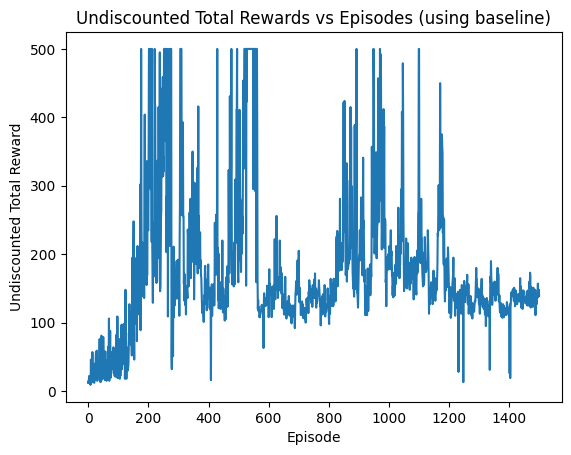

In [13]:
plt.plot(rs)
plt.title(f"Undiscounted Total Rewards vs Episodes ({"using" if BASELINE else "without"} baseline)")
plt.xlabel("Episode")
plt.ylabel("Undiscounted Total Reward")
plt.show()

In [14]:
from gymnasium.wrappers import RecordVideo
import datetime
dt = datetime.datetime.now()
# Define class to record test output runs
env = RecordVideo(env, video_folder="videos/", name_prefix=f"vpg_eval_{dt.day}d{dt.hour}h{dt.minute}m{dt.second}s")
# Evaluation loop, deterministically stepping in our environment to test our learned actor policy
obs, info = env.reset()
done = False
score = 0
while not done:
    action = model.predict(obs)
    next_obs, reward, done, _, info = env.step(action)
    obs = next_obs
    score += reward
print(f"Recorded Episode 1: Score = {score:.2f}")
env.close()
print("Video saved to 'videos/' folder.")

C:\Users\carey\AppData\Local\Programs\Python\Python313\Lib\site-packages\gymnasium\wrappers\rendering.py:293: UserWarning: WARN: Overwriting existing videos at C:\Users\carey\OneDrive\Desktop\Work\Uni\Year 3\Reinforcement Learning\Coursework1\videos folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Recorded Episode 1: Score = 150.00
Video saved to 'videos/' folder.
